In [3]:
import numpy as np 
import pandas as pd 
import sklearn
import warnings

In [ ]:
def warn(*args, **kwargs):
    pass 
warnings.warn = warn

In [6]:
# !pip install imblearn

In [7]:
# file csv yang akan diproses
file_1 = 'gas.csv'

# panggil  filenya dan masukan ke dalam variabel data_n
data_1 = pd.read_csv(file_1)

# lihat dimensi semua filenya 
print('(n_baris, n_kolom)')
print('data_1 :\n', data_1.shape)

(n_baris, n_kolom)
data_1 :
 (50, 5)


### DATA_1

In [8]:
# lihat unique setiap kolom 
for col in data_1.columns:
    out = data_1[col].unique()
    print(col, ' :\n', out)

Gas  :
 ['Normal' 'Normal ' 'Berat' 'Sedang']
Slongsong Gas  :
 ['Bagus' 'Sangat berkarat' 'Cukup berkarat']
Tali Gas  :
 ['Bagus' 'Putus']
Oli  :
 [1.   2.   3.   0.5  0.75 1.5  0.25 1.25 1.75 2.75]
Hasil  :
 ['Kondisi baik' 'Kondisi rusak']


In [9]:
# kita lihat nilai - nilai unique dalam datanya
data_1['Hasil'].unique()

array(['Kondisi baik', 'Kondisi rusak'], dtype=object)

In [10]:
# kita hitung berapa jumlah kelas di kolom 'Hasil' tersbeut 
data_1['Hasil'].value_counts()

Kondisi baik     25
Kondisi rusak    25
Name: Hasil, dtype: int64

Terlihat bahwa jumlah class yang tersebar di dalam kolom Hasil itu bersifat tidak merata. artinya class 'Tidak ada yang diganti' memiliki jumlah paling banyak (mendominasi) dibandingkan dengan class yang lain seperti 'Oli diganti', 'tali gas diganti' dll. sehingga, agar menghasilkan model yang baik, maka jumlah class ini harus disama-ratakan (balancing) agar distribusi nilainya merata. sehingga akan semakin baik dalam menyimpulkan/memprediksi data

In [11]:
# ARSIP RANDOM OVERSAMPLING
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

def oversampling_or_not(oversampling=False):

    # kita pecah datasetnya menjadi dua bagian yaitu variabel features dan variabel target
    # X ==> berisi variabel-variabel features
    
    X = data_1.iloc[:, :-1]

    # Y ==> berisi sebuah variabel target
    y = data_1.iloc[:, -1]
    if oversampling == False:
        print("No Oversampling")
        return X, y

    # mulai sampling
    else:
        print("Oversampling Mode")
        ros = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = ros.fit_sample(X, y)
        print('dimension after oversampling')
        print('X_resampled\n', X_resampled.shape)
        print('y_resampled\n', y_resampled.shape)
        # lihat hasil setelah oversampling
        out = pd.DataFrame({'x_resampled':y})
        print(out['x_resampled'].value_counts())
        return X_resampled, y_resampled

In [12]:
# REKONSTRUKSI ULANG DATA_1-Nya
# TENTUKAN APAKAH MAU DIOVERSAMPLING ATAU TIDAK
X, y = oversampling_or_not(oversampling=False)

data_1_rev = pd.DataFrame(X)
data_1_rev['hasil'] = y
data_1_rev.head()

No Oversampling


Gas    Slongsong Gas Tali Gas  Oli          hasil
0   Normal            Bagus    Bagus  1.0   Kondisi baik
1   Normal            Bagus    Bagus  2.0  Kondisi rusak
2   Normal            Bagus    Putus  1.0  Kondisi rusak
3  Normal   Sangat berkarat    Putus  1.0  Kondisi rusak
4    Berat  Sangat berkarat    Putus  1.0  Kondisi rusak

#### perbaiki nama kolomnya 

In [161]:
list_nama_kolom = data_1.columns # out ==> ['Gas', 'Slongsong Gas', 'Tali Gas', 'Oli', 'Hasil']
data_1_rev.columns = list_nama_kolom
data_1_rev.head()

Gas    Slongsong Gas Tali Gas  Oli          Hasil
0   Normal            Bagus    Bagus  1.0   Kondisi baik
1   Normal            Bagus    Bagus  2.0  Kondisi rusak
2   Normal            Bagus    Putus  1.0  Kondisi rusak
3  Normal   Sangat berkarat    Putus  1.0  Kondisi rusak
4    Berat  Sangat berkarat    Putus  1.0  Kondisi rusak

### Data Encoding (Transformation)

In [162]:
from sklearn import preprocessing
trans = preprocessing.LabelEncoder()
columns = data_1_rev.columns
data_encoded_storage = {}
labels_storage = {} # ini untuk meta data
for col in columns:
    out = trans.fit_transform(data_1_rev[col])
    out_lbl = trans.classes_
    labels_storage.update({col:out_lbl})
    data_encoded_storage.update({col:out})

### Rekonstruksi kembali dataset data_1_rev-nya ke dalam dataframe

In [163]:
data_1_rev = pd.DataFrame(data_encoded_storage)
data_1_rev.head() # lihat cuman 5 record data saja

Gas  Slongsong Gas  Tali Gas  Oli  Hasil
0    1              0         0    3      0
1    1              0         0    7      1
2    1              0         1    3      1
3    2              2         1    3      1
4    0              2         1    3      1

In [164]:
def train_test_split(data, persentase):
    row = data.shape[0]
    size = int(row * (persentase / 100))
    out = row - size
    x_train = data.iloc[:out, :-1]
    x_test = data.iloc[out:, :-1]
    y_train = data.iloc[:out, -1]
    y_test = data.iloc[out:, -1]
    return x_train, x_test, y_train, y_test

### Splitting datanya menjadi training dan testing

In [165]:
from sklearn import model_selection
FEATURES = data_1_rev.iloc[:, :-1]
TARGET = data_1_rev.iloc[:, -1]

'''
dalam hal ini, kita akan membagi dataset menjadi dua yaitu 
training sebanyak 80% dan testing sebanyak 20%
'''

x_train, x_test, y_train, y_test = train_test_split(data=data_1_rev, persentase=20)
# cek dimensi datanya 
print('x_train : ', x_train.shape)
print('y_train : ', y_train.shape)
print('x_test  : ',  x_test.shape)
print('y_test  : ',  y_test.shape)

x_train :  (40, 4)
y_train :  (40,)
x_test  :  (10, 4)
y_test  :  (10,)


In [166]:
# import library algoritma pelatihannya
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# import library untuk mengukur akurasi dan laporan hasil klasifikasi
from sklearn.metrics import accuracy_score, classification_report

# inisialisasi model-nya
models = {
    "Support_vector_machine": SVC(kernel="linear", gamma="auto"),
    "Decission_Tree": DecisionTreeClassifier(criterion='entropy'),
    "multi_layer_perceptron": MLPClassifier(hidden_layer_sizes=(250),max_iter=1000,batch_size=100)
}

# membuat fungsi untuk melakukan fungsi fitting atau training
def train_model (model,xtrain,ytrain):
    model.fit(xtrain,ytrain)

# membuat fungsi untuk menampilkan akurasi dan classifiation_report
def predict(i,model,xtest,ytest):
    pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, pred) * 100
    print("\n",i,":")
    print(classification_report(ytest, pred))
    print("accuracy : \n", round(accuracy,3),"%\n")

# melakukan training dengan menggunakan semua algoritma yang telah diinisialisasi
for i in models:
    train_model(models[i],x_train,y_train)
    predict(i,models[i],x_test,y_test)


 Support_vector_machine :
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.67      0.50      0.57         4

   micro avg       0.70      0.70      0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10

accuracy : 
 70.0 %


 Decission_Tree :
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.75      0.75      0.75         4

   micro avg       0.80      0.80      0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10

accuracy : 
 80.0 %


 multi_layer_perceptron :
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.75      0.75      0.75         4

   micro avg       0.80      0.80      0.80        10
   macro avg 

In [167]:
labels_storage.get('Hasil')

array(['Kondisi baik', 'Kondisi rusak'], dtype=object)

## Persiapan Production ke web service

In [146]:
# kita siimpan model yang sudah dihasilkan ke format pickle (.pkl)
# import library pickle-nya
import pickle
import os 

# ambil models nya
data_no = 1
folder_name = 'model_{}'.format(data_no)

if os.path.exists(folder_name):
    print('path exist')
else:
    os.mkdir(folder_name)

model = models['Decission_Tree']

# simpan file model yang sudah dilatih ke dalam format pickle
model_name = '{}/model_data_{}.pkl'.format(folder_name, data_no)
pickle.dump(model, open(model_name, 'wb'))

# simpan variabel class_keputusan ke dalam format pickle
label_name = '{}/label_data_{}.pkl'.format(folder_name, data_no)
pickle.dump(labels_storage, open(label_name, 'wb'))

print('Done')

path exist
Done


In [83]:
idx = 1
predictor = [[0,0,0,5]]
output = model_mlp.predict(predictor)[0]
out_kondisi = labels_storage.get('Hasil')[output]
if out_kondisi != 'Kondisi rusak':
    if data_1['Gas'].values[idx] == 'Berat':
        print('Perbaiki gas')
    if data_1['Slongsong Gas'].values[idx] == 'Sangat berkarat':
        print('ganti selongsong gas')
    if data_1['Oli'].values[idx] > 1.5:
        print('ganti oli')
    if data_1['Tali Gas'].values[idx] == 'Putus':
        print('Ganti tali gas')

ganti oli


In [75]:
# lihat unique setiap kolom 
for col in data_1.columns:
    out = data_1[col].unique()
    print(col, ' :\n', out)

Gas  :
 ['Normal' 'Normal ' 'Berat' 'Sedang']
Slongsong Gas  :
 ['Bagus' 'Sangat berkarat' 'Cukup berkarat']
Tali Gas  :
 ['Bagus' 'Putus']
Oli  :
 [1.   2.   3.   0.5  0.75 1.5  0.25 1.25 1.75 2.75]
Hasil  :
 ['Kondisi baik' 'Kondisi rusak']


In [56]:
data_1.head()

Gas    Slongsong Gas Tali Gas  Oli (Bulan)          Hasil
0   Normal            Bagus    Bagus          1.0   Kondisi baik
1   Normal            Bagus    Bagus          2.0  Kondisi rusak
2   Normal            Bagus    Putus          1.0  Kondisi rusak
3  Normal   Sangat berkarat    Putus          1.0  Kondisi rusak
4    Berat  Sangat berkarat    Putus          1.0  Kondisi rusak

In [53]:
# if out_kondisi != 'Kondisi rusak':
#     print('rusak')
#     if data_1['Gas'].values[idx] == 'Berat':
#         print('butuh pengecekan lebih lanjut')
#     elif data_1['Gas'].values[idx] == 'Normal':
#         if data_1['Slongsong Gas'].values[idx] == 'Sangat berkarat':
#             print('Slongsong Gas Harus diganti')
#         if data_1['Slongsong Gas'].values[idx] == 'Bagus':
#             if data_1['Tali Gas'].values[idx] == 'Putus':
#                 print('Tali Gas Harus diganti')
#             elif data_1['Tali Gas'].values[idx] == 'Bagus':
#                 if data_1['Oli'].values[idx] == '>3bulan':
#                     print('Oli harus diganti')
#                 else:
#                     print('Gas normal')
            
# x_test_['Slongsong Gas'].values

In [95]:
x_test_init['Gas'].values[6]

4.  Gas
#1 Jika gas tidak normal butuh pengecekan lebih lanjut. Jika normal, lanjut ke rules #2
#2 Jika slongsong gas berkarat atau rusak, harus diganti. Jika bagus, lanjut ke rules #3
#3 Jika tali gas putus, maka harus diganti. Jika bagus, lanjut ke rules #4
#4 Jika oli sudah lama tidak diganti, maka harus diganti. Jika bagus, gas sudah dapat kembali normal.

Gas  :
 ['Normal' 'Normal ' 'Berat' 'Sedang']
Slongsong Gas  :
 ['Bagus' 'Sangat berkarat' 'Cukup berkarat']
Tali Gas  :
 ['Bagus' 'Putus']
Oli (Bulan)  :
 [1.   2.   3.   0.5  0.75 1.5  0.25 1.25 1.75 2.75]
Hasil  :
 ['Kondisi baik' 'Kondisi rusak']


## VISUALISAI OUTPUT DECISION TREE

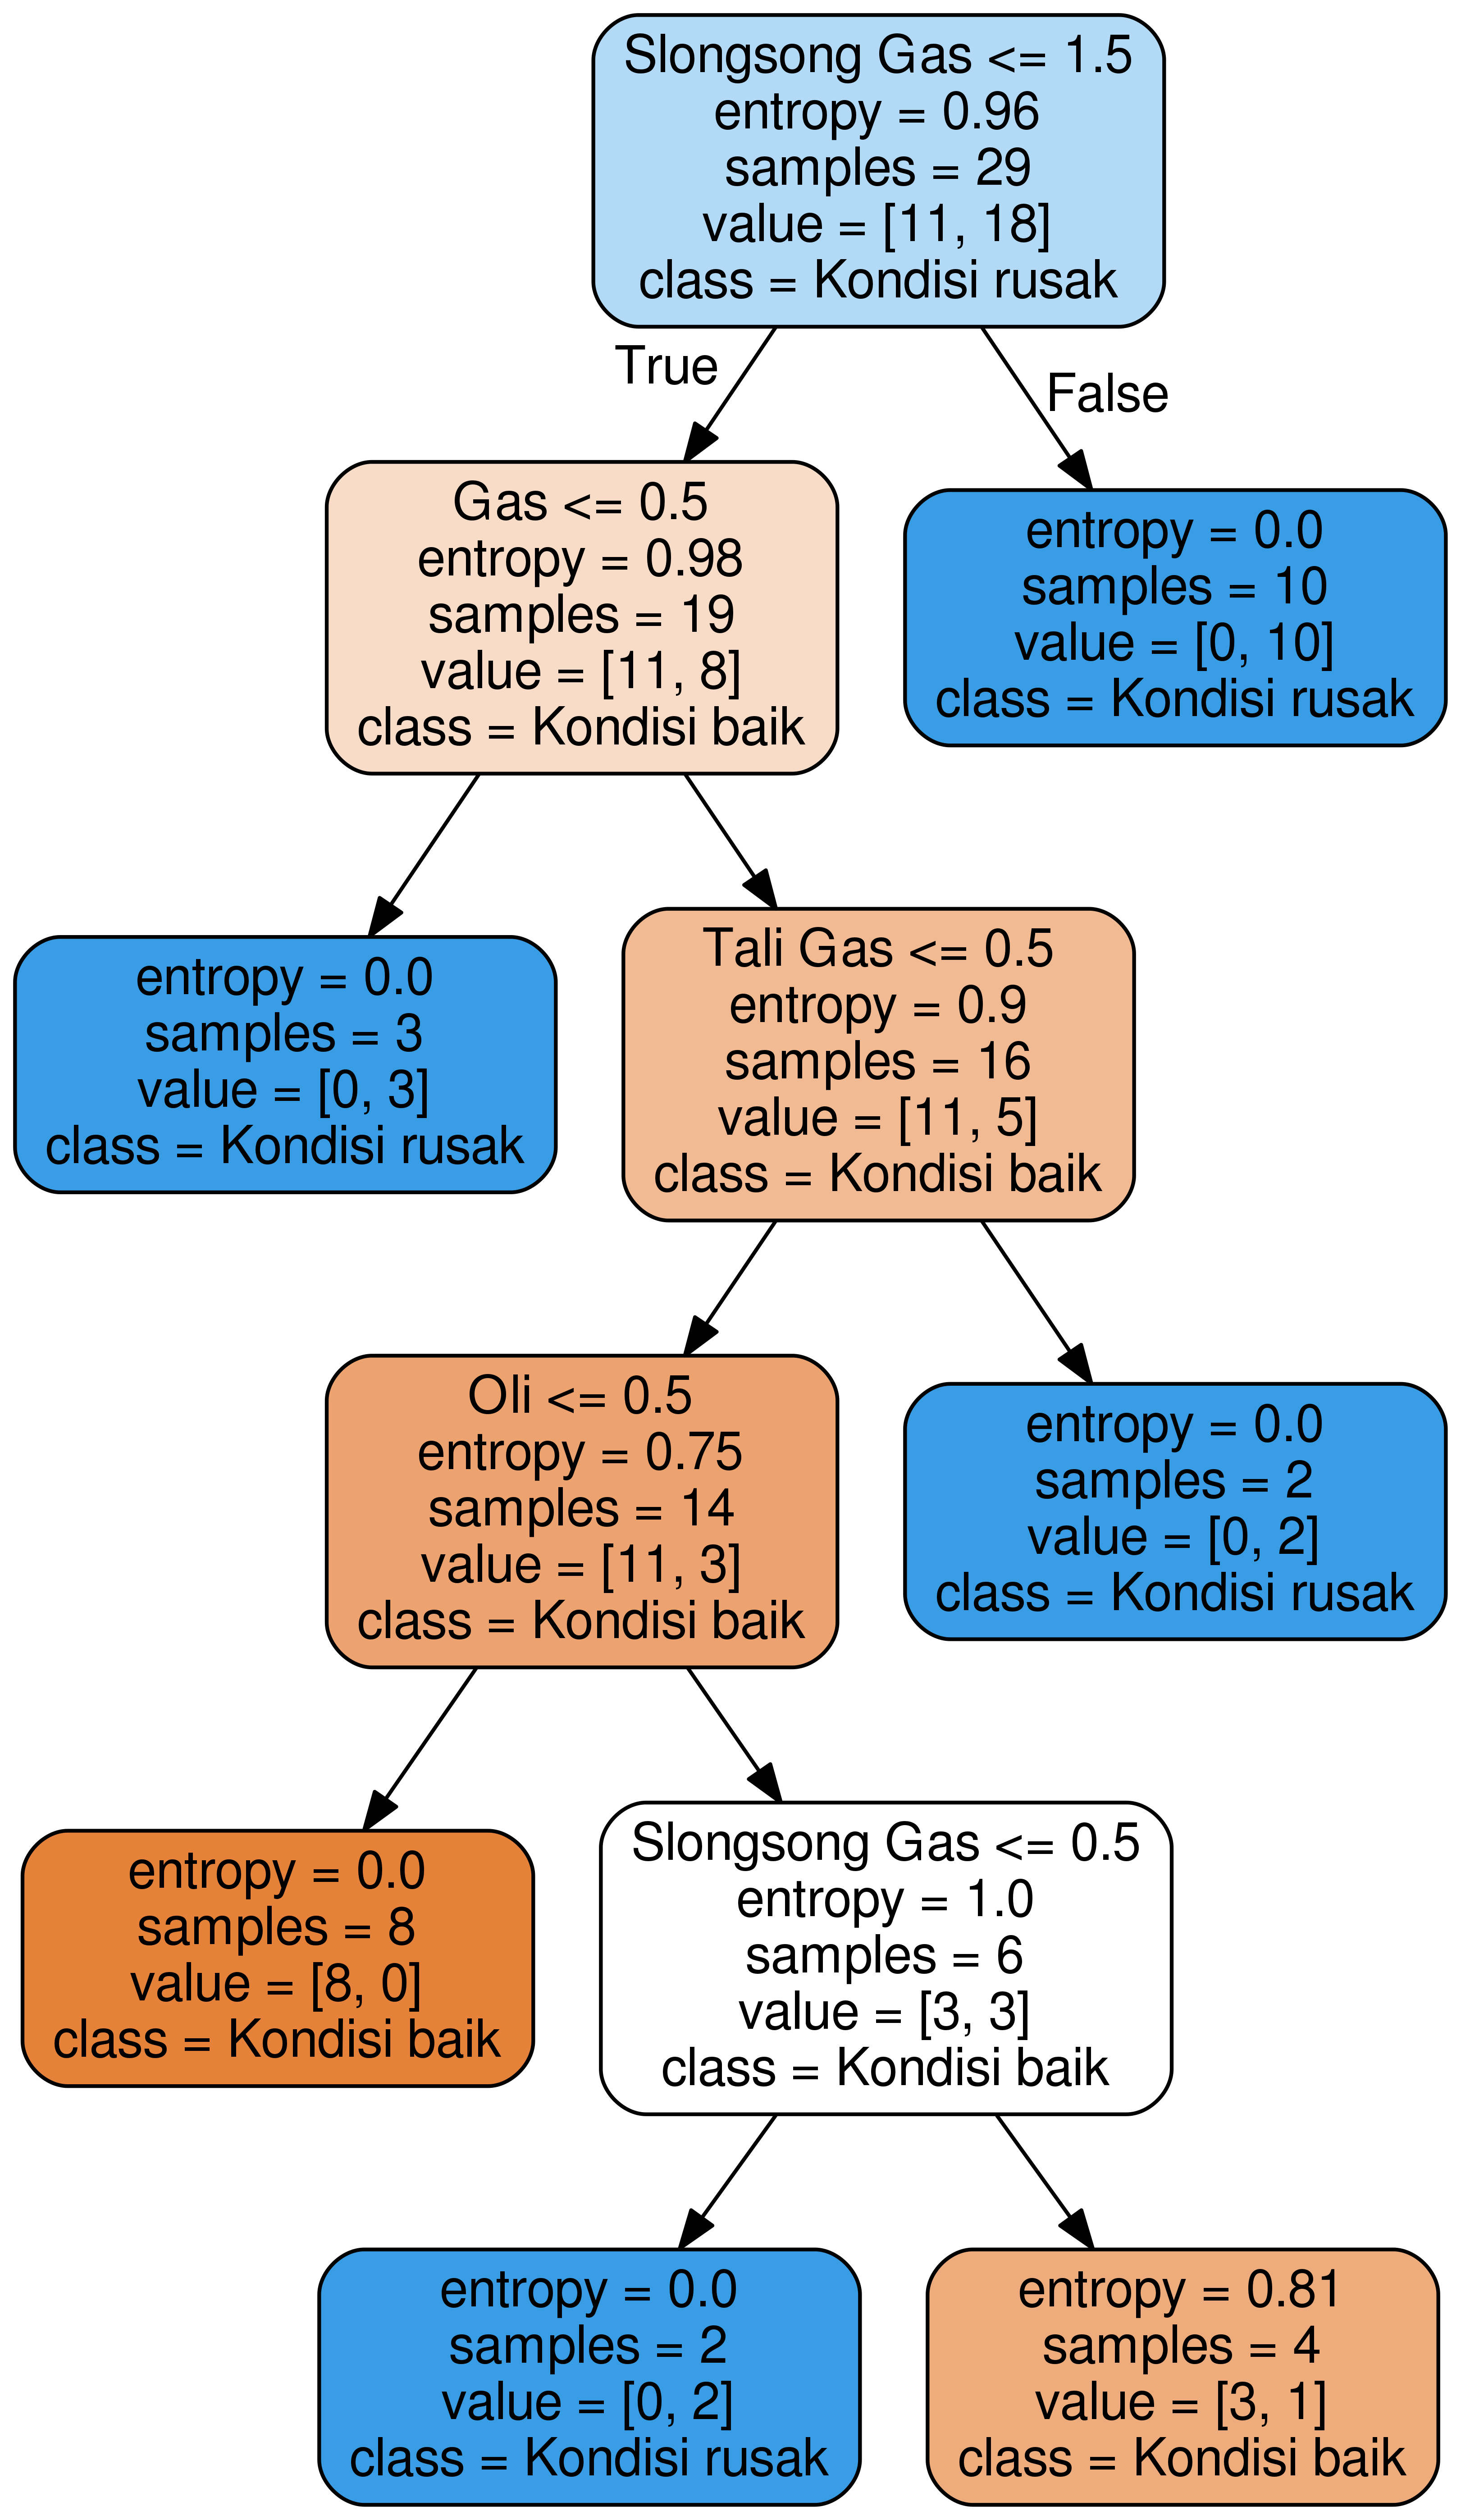

In [137]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(model_mlp, out_file='tree.dot', 
                feature_names = data_1.iloc[:, :-1].columns,
                class_names = data_1.iloc[:, -1].unique(),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png', width=500)

In [121]:
!pip install pydotplus

    100% |████████████████████████████████| 286kB 206kB/s 
  Stored in directory: /home/toufani/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


1.	Rem
#1 Jika sil master bocor maka harus diganti. Jika sil master masih bagus,lanjut ke rules #2
#2 Jika ring piston kotor maka harus dibersihkan. Jika ring piston bersih,lanjut ke rules#3
#3 Jika kampas rem masih tipis, kampas rem harus diganti, jika sudah diganti rem sudah selesai diperbaiki.


2.  Starter
#1 Jika aki voltase < 12V dan arus < 3A, maka aki harus diganti. Jika 	
Aki voltase = 12V dan arus =3A, maka lanjut ke rules #2
#2 Jika umur aki > 1tahun, maka aki harus diganti. Jika umur aki <1tahun, lanjut ke rules #3 Jika switch starter tidak berbunyi, maka harus diganti. Jika switch starter berbunyi, lanjut ke rules #4
#4 Jika arang starter = 0,2 , maka harus diganti. Jika arang starter >0,2, lanjut ke rules #5
#5 Jika lahar dinamo starter meleleh, maka harus diganti. Jika lahar dinamo starter masih bagus, lanjut ke rules #6
#6 Jika dinamo hangus, maka harus diganti. Jika dinamo masih bagus, starter sudah bisa berjalan dengan baik.

     
3.  Lampu
#1 Jika bohlam putus,maka harus diganti. Jika bohlam masih bagus, lanjut ke rules #2
#2 Jika timah soket meleleh,maka harus diganti. Jika timah soket bagus, lanjut ke #3
#3 Jika kabel lampu putus, maka harus diganti. Jika kabel lampu bagus, lanjut ke rules #4
#4 Jika saklar lampu rusak, maka harus diganti. Jika saklar bagus, lanjut ke rules #5
#5 Jika sepul rusak, maka harus diganti. Jika sepul bagus, lanjut ke rules #6
#6 Jika regulator rusak, maka harus diganti. Jika regulator bagus, lampu dapat menyala.


